In [6]:
# 读取数据
from keras.preprocessing.image import ImageDataGenerator

IMSIZE = 224
train_generator = ImageDataGenerator(rescale=1. / 255).flow_from_directory('../../data/data_inception/train',
                                                                           target_size=(IMSIZE, IMSIZE),
                                                                           batch_size=10,
                                                                           class_mode='categorical'
                                                                           )

validation_generator = ImageDataGenerator(rescale=1. / 255).flow_from_directory('../../data/data_inception/test',
                                                                                target_size=(IMSIZE, IMSIZE),
                                                                                batch_size=10,
                                                                                class_mode='categorical')

Found 952 images belonging to 17 classes.
Found 408 images belonging to 17 classes.


<Figure size 432x288 with 0 Axes>

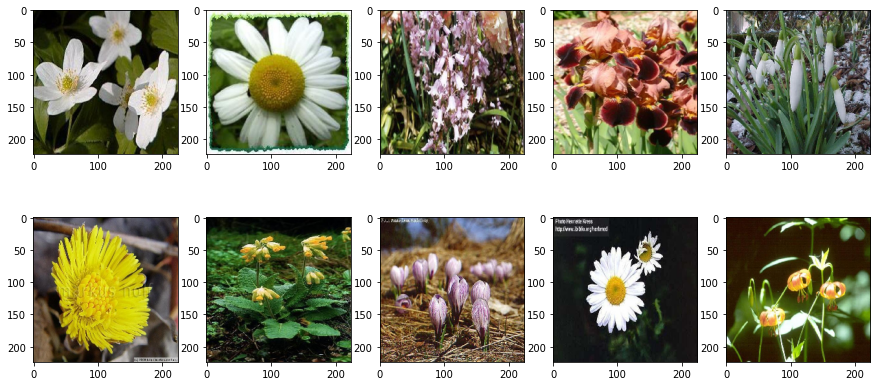

In [7]:
# 展示数据
from matplotlib import pyplot as plt

plt.figure()
fig, ax = plt.subplots(2, 5)
fig.set_figheight(7)
fig.set_figwidth(15)
ax = ax.flatten()
X, Y = next(train_generator)
for i in range(10): ax[i].imshow(X[i, :, :, :])

In [8]:
#相比于之前，这里需要导入concatenate函数
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D
from keras.layers import Flatten, Dropout, Dense, Input, concatenate
from keras import Model

input_layer = Input([IMSIZE, IMSIZE, 3])
x = input_layer
x = Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(x)
x = BatchNormalization(axis=3)(x)
x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)

x = Conv2D(192, (3, 3), strides=(1, 1), padding='same', activation='relu')(x)
x = BatchNormalization(axis=3)(x)  #para=4*192=768
x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)
x

<tf.Tensor 'max_pooling2d_22/MaxPool:0' shape=(?, 28, 28, 192) dtype=float32>

In [9]:
for i in range(9):
    brach1x1 = Conv2D(64, (1, 1), strides=(1, 1), padding='same', activation='relu')(x)
    brach1x1 = BatchNormalization(axis=3)(brach1x1)
    brach3x3 = Conv2D(96, (1, 1), strides=(1, 1), padding='same', activation='relu')(x)
    brach3x3 = BatchNormalization(axis=3)(brach3x3)

    brach3x3 = Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu')(brach3x3)
    brach3x3 = BatchNormalization(axis=3)(brach3x3)

    brach5x5 = Conv2D(16, (1, 1), strides=(1, 1), padding='same', activation='relu')(x)
    brach5x5 = BatchNormalization(axis=3)(brach5x5)

    brach5x5 = Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu')(brach5x5)
    brach5x5 = BatchNormalization(axis=3)(brach5x5)

    branchpool = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
    branchpool = Conv2D(32, (1, 1), strides=(1, 1), padding='same', activation='relu')(branchpool)
    branchpool = BatchNormalization(axis=3)(branchpool)
    x = concatenate([brach1x1, brach3x3, brach5x5, branchpool], axis=3)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)

x = Dropout(0.4)(x)
x = Flatten()(x)
x = Dense(17, activation='softmax')(x)
output_layer = x
model = Model(input_layer, output_layer)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_57 (Conv2D)              (None, 112, 112, 64) 9472        input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_57 (BatchNo (None, 112, 112, 64) 256         conv2d_57[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_21 (MaxPooling2D) (None, 56, 56, 64)   0           batch_normalization_57[0][0]     
____________________________________________________________________________________________

In [10]:
#Inception V1模型编译与拟合
#运行
from keras.optimizers import Adam

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
model.fit_generator(train_generator, epochs=20, validation_data=validation_generator)

Epoch 1/20
96/96 [==============================] - 26s 268ms/step - loss: 3.6350 - accuracy: 0.0851 - val_loss: 2.6780 - val_accuracy: 0.0588
Epoch 2/20
96/96 [==============================] - 14s 151ms/step - loss: 3.3101 - accuracy: 0.1239 - val_loss: 2.9508 - val_accuracy: 0.0613
Epoch 3/20
96/96 [==============================] - 14s 148ms/step - loss: 3.1150 - accuracy: 0.1229 - val_loss: 3.0124 - val_accuracy: 0.0686
Epoch 4/20
96/96 [==============================] - 16s 163ms/step - loss: 3.1945 - accuracy: 0.1029 - val_loss: 3.1311 - val_accuracy: 0.0662
Epoch 5/20
96/96 [==============================] - 15s 155ms/step - loss: 3.0281 - accuracy: 0.1155 - val_loss: 2.9253 - val_accuracy: 0.1054
Epoch 6/20
48/96 [==============>...............] - ETA: 7s - loss: 3.0832 - accuracy: 0.1186

KeyboardInterrupt: 